# Required Packages and Utilities

In [1]:
# Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Exploratory Data Analysis

In [2]:
# Import csv file to DataFrame format
uti_dataset = pd.read_csv("dataset.csv")

In [3]:
# Show first five rows
uti_dataset.head()

,Record_Year,Patient_Number,Gender,Age,Malnourished,History of Urinary Infection,Fever,Presence of UTI symptoms,Bacteriuria
0,2016,308587,F,9.0,Yes,Yes,Yes,Yes,Yes
1,2016,387045,M,8.0,Yes,No,No,No,No
2,2016,353439,F,4.0,Yes,No,Yes,Yes,Yes
3,2016,388575,M,14.0,No,No,No,No,No
4,2016,317053,M,3.0,Yes,Yes,Yes,Yes,Yes


In [4]:
# Get number of rows and columns
uti_dataset.shape

(412, 9)

In [6]:
# Replace space between words in column headings with underscore(s)
uti_dataset.columns = [column.replace(' ', '_') for column in list(uti_dataset.columns)]

# Mapping of ages to age categories
age_category = uti_dataset['Age'].map(lambda a: 'Less than 7 years' if a < 7 else '7 years and more')
uti_dataset['Age_Category'] = age_category

uti_dataset.columns

Index(['Record_Year', 'Patient_Number', 'Gender', 'Age', 'Malnourished',
       'History_of_Urinary_Infection', 'Fever', 'Presence_of_UTI_symptoms',
       'Bacteriuria', 'Age_Category'],
      dtype='object')

In [7]:
# Show the names and datatypes of columns
uti_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Record_Year                   412 non-null    int64  
 1   Patient_Number                412 non-null    int64  
 2   Gender                        412 non-null    object 
 3   Age                           412 non-null    float64
 4   Malnourished                  412 non-null    object 
 5   History_of_Urinary_Infection  412 non-null    object 
 6   Fever                         412 non-null    object 
 7   Presence_of_UTI_symptoms      412 non-null    object 
 8   Bacteriuria                   412 non-null    object 
 9   Age_Category                  412 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 32.3+ KB


In [8]:
# Number of records in each year
uti_dataset['Record_Year'].value_counts()

2019    89
2017    82
2018    71
2021    66
2020    57
2016    47
Name: Record_Year, dtype: int64

In [9]:
# Show categories of diagnosis in each year
uti_dataset.groupby('Record_Year')['Bacteriuria'].value_counts()

Record_Year  Bacteriuria
2016         No             24
             Yes            23
2017         No             43
             Yes            39
2018         No             49
             Yes            22
2019         No             62
             Yes            27
2020         No             35
             Yes            22
2021         No             38
             Yes            28
Name: Bacteriuria, dtype: int64

In [10]:
# Display the count of individuals with and without bacteriuria.
print(uti_dataset['Bacteriuria'].value_counts())

No     251
Yes    161
Name: Bacteriuria, dtype: int64


Bacteriuria  Gender
No           M         127
             F         124
Yes          F         101
             M          60
Name: Gender, dtype: int64


[Text(0, 0, 'Bacteriuria'), Text(1, 0, 'No Bacteriuria')]

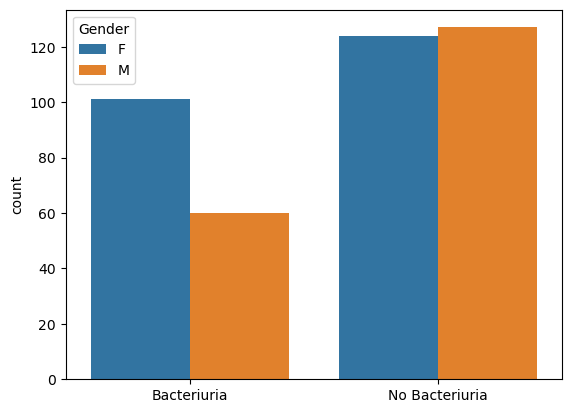

In [11]:
# Show distribution of bacteriuria by gender
print(uti_dataset.groupby('Bacteriuria')['Gender'].value_counts())

fig, ax = plt.subplots()
sns.countplot(data=uti_dataset, x='Bacteriuria', hue='Gender', ax=ax)
ax.set(xlabel=None)
ax.set_xticklabels(['Bacteriuria', 'No Bacteriuria'])

Bacteriuria  Age_Category     
No           7 years and more     146
             Less than 7 years    105
Yes          Less than 7 years    118
             7 years and more      43
Name: Age_Category, dtype: int64


[Text(0, 0, 'Bacteriuria'), Text(1, 0, 'No Bacteriuria')]

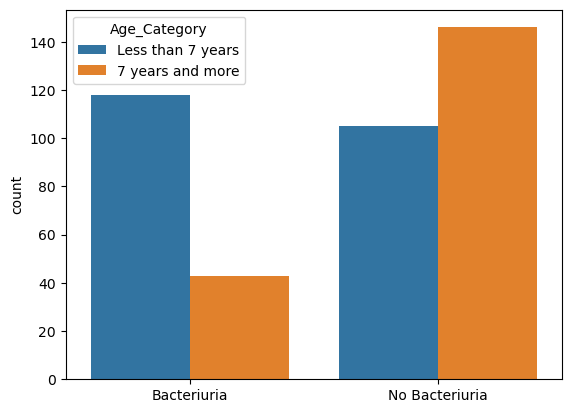

In [12]:
# Show distribution of bacteriuria by age category
print(uti_dataset.groupby('Bacteriuria')['Age_Category'].value_counts())

fig, ax = plt.subplots()
sns.countplot(data=uti_dataset, x='Bacteriuria', hue='Age_Category',
              hue_order=['Less than 7 years', '7 years and more'], ax=ax)
ax.set(xlabel=None)
ax.set_xticklabels(['Bacteriuria', 'No Bacteriuria'])

# Data Transformation

### Binary Classification Task:
-  No / F = 0
-  Yes / M = 1

In [13]:
# Mapping of No & F to 0, and Yes & M to 1
features = ['Malnourished', 'History_of_Urinary_Infection', 'Fever', 'Presence_of_UTI_symptoms', 'Bacteriuria']

for column in features:
    uti_dataset[column] = uti_dataset[column].map(lambda a: 0 if a == 'No' else 1)
    
uti_dataset['Gender'] = uti_dataset['Gender'].map(lambda a: 0 if a == 'F' else 1)
    
uti_dataset.head()

,Record_Year,Patient_Number,Gender,Age,Malnourished,History_of_Urinary_Infection,Fever,Presence_of_UTI_symptoms,Bacteriuria,Age_Category
0,2016,308587,0,9.0,1,1,1,1,1,7 years and more
1,2016,387045,1,8.0,1,0,0,0,0,7 years and more
2,2016,353439,0,4.0,1,0,1,1,1,Less than 7 years
3,2016,388575,1,14.0,0,0,0,0,0,7 years and more
4,2016,317053,1,3.0,1,1,1,1,1,Less than 7 years


In [15]:
# Drop target and irrelevant columns to get only transformed features
numeric_features = list(uti_dataset.columns.drop(['Record_Year', 'Age_Category', 'Bacteriuria']))

# Combine relevant features to get training data
training_set = uti_dataset[numeric_features]

# Labels
labels = uti_dataset['Bacteriuria']

<Axes: >

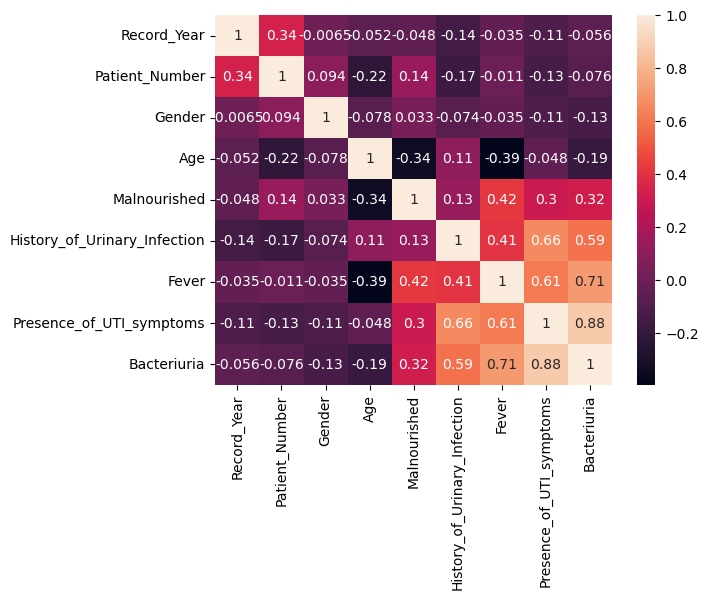

In [14]:
# Correlation among variables
corr_set = uti_dataset[list(uti_dataset.columns.drop(['Record_Year', 'Age_Category']))]
sns.heatmap(corr_set.corr(), annot=True)

# Model Fitting, Prediction & Evaluation

In [16]:
# Set seed for reproducibility
SEED = 21

# Instantiate classifiers
classifiers = [("Decision Tree", DecisionTreeClassifier(random_state=SEED)),
          ("Logistic Regression", LogisticRegression(random_state=SEED)),
          ("KNN", KNeighborsClassifier())]

In [17]:
# Split data into 70% training set and 30% test set
# X: features; y: targets
X_train, X_test, y_train, y_test = train_test_split(training_set, labels, test_size=0.3, random_state=SEED, stratify=labels)

## Ensemble Learning

In [18]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)


The Metrics for VotingClassifier are: 

Accuracy: 0.96
Precision: 0.957
Recall: 0.938
Specificity: 0.974
ROC_AUC: 0.956 


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.96      0.94      0.95        48

    accuracy                           0.96       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.96      0.96      0.96       124

[[74  2]
 [ 3 45]]


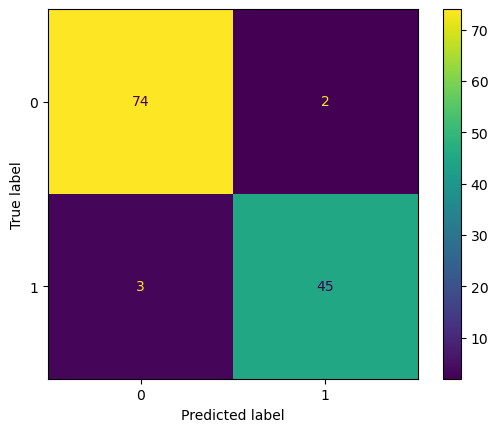

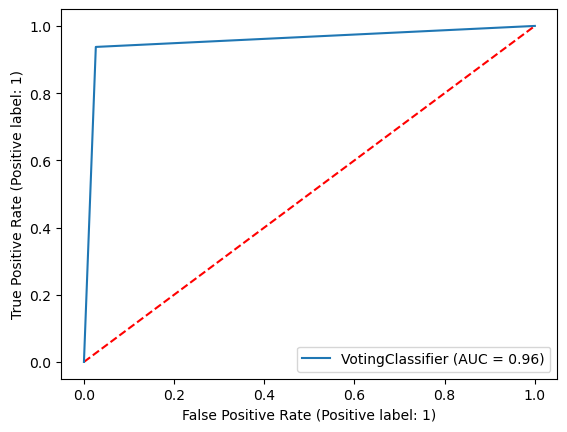

In [19]:
# Evaluate model

model_name = vc.__class__.__name__
cm = metrics.confusion_matrix(y_test, y_pred, labels=vc.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vc.classes_)

# Mapping of scorer name to scorer function
accuracy = np.round(accuracy_score(y_test, y_pred), 3)
precision = np.round(metrics.precision_score(y_test, y_pred), 3)
recall = np.round(metrics.recall_score(y_test, y_pred), 3)
specificity = np.round(cm[0,0]/(cm[0,0]+cm[0,1]), 3)
roc_auc = np.round(roc_auc_score(y_test, y_pred), 3)

print("\nThe Metrics for {} are: ".format(model_name))

print('\nAccuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('Specificity: {}'.format(specificity))
print('ROC_AUC: {} \n\n'.format(roc_auc))

print(classification_report(y_test, y_pred))
print(cm)
cm_display.plot()
plt.show()
    
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'r--')
RocCurveDisplay.from_predictions(y_test, y_pred, name=str(model_name), ax=ax)
plt.show()

# Saving the trained model

In [20]:
# Save model using pickle
filename = 'sb_classifier.sav'

# Write to file in binary format
pickle.dump(vc, open(filename, 'wb'))

In [21]:
# Load saved model for reading in binary format
loaded_model = pickle.load(open(filename, 'rb'))

In [22]:
print(training_set.columns)

input_data = [0, 9, 1, 1, 1, 1]

# Changing the input_data to numpy array
input_data_as_array = np.array(input_data)

# Reshape array as we are predicting one instance
input_data_reshaped = input_data_as_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The patient does not have significant bacteriuria')
else:
    print('The patient has significant bacteriuria')

Index(['Gender', 'Age', 'Malnourished', 'History_of_Urinary_Infection',
       'Fever', 'Presence_of_UTI_symptoms'],
      dtype='object')
[1]
The patient has significant bacteriuria
